In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gradient Descent (Advanced)

In this exercise, we will

- Code your own gradient descent in vectorized form for a high-dimension loss function
- Finetune your choice of number of epochs on gradient descent

## 1. Our dataset

We are going to study the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) and try to predict the **intensity of the disease** based on **10 quantitative features** such as body-mass-index, age, etc...(regression problem)

In [0]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

In [0]:
X.head()

In [0]:
sns.histplot(y, kde=True);

## 2. Code your vectorial gradient descent

We're modeling a linear regression $\hat{y} = X\beta$

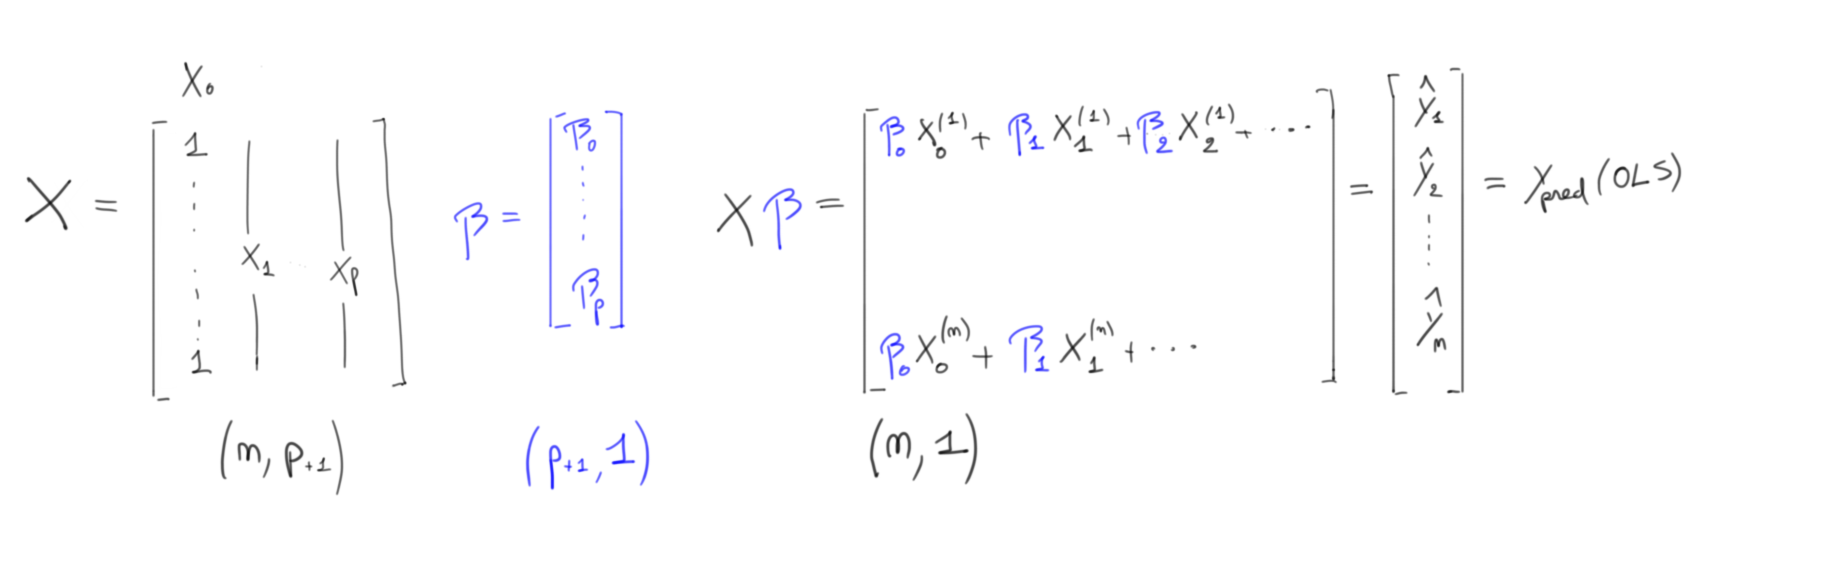

So, first, let's add an "intercept" column of "ones" to our feature matrix X

In [0]:
# Let's add an intercept column of "ones" 
X = np.hstack((X, np.ones((X.shape[0],1))))
X.shape

In [0]:
pd.DataFrame(X).head()

We create for you a train test split with `test_size=0.3` and `random_state=1` (so we all have same results)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store below our main problem parameters:

In [0]:
# n observations
n = X.shape[0] 
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# p features (including intercept)
p = X.shape[1]

# Gradient Descent hyper-params
eta = 0.1
n_epochs= 100

❓ Initialize a $\beta$ vector of zeros of shape **p**

In [0]:
# YOUR CODE HERE

❓ Using the vectorized formula given above, create a gradient descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of numpy's matrix operations and broadcasting capabilities
- this shouldn't take more than 4 lines of code!

In [0]:
# Code your gradient descent in less than 4 lines of code

## Predict

❓Compute predictions on your test set (`y_pred`), the resulting `loss_test` (MSE loss for OLS).

In [0]:
# YOUR CODE HERE

In [0]:
# YOUR CODE HERE

## Wrap these into a function `gradient_decent`

❓ Wrap this logic into a function `gradient_descent`, which takes as input some (`X_train`, `y_train`, `X_test`, `y_test`, `eta`, `n_epoch`) values, and returns:
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list `loss_train_history`
- the values of the `loss_test` at each epoch as a list `loss_test_history`
- (optional) make the fonction robust to call with only a train_set

In [0]:
def gradient_descent(X_train, y_train, X_test, y_test, eta=eta, n_epochs=100):
        
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    
    beta = np.zeros(p)
    
    loss_train_history = []
    loss_test_history = []
    
    pass  # YOUR CODE HERE
        
    return beta, loss_train_history, loss_test_history

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=10000` and `eta=0.1` as per initially set
- Zoom with `plt.ylim(ymin=2800, ymax=3000)` in to see the behavior of the loss function on the test set
- What can you conclude? Should you always descent gradient down to the absolute minimum?

In [0]:
# YOUR CODE HERE

❓ What do you notice?

In [0]:
# YOUR CODE HERE

❓Can you think of a method to improve the performance of your model? Take time to write it in pseudo-code below before looking at the Hints.



<details>
    <summary>Hints</summary>

- We could decide to stop the gradient descent as soon as the non-train loss starts to increase back up again.
- ⚠️ Yet we can't use the "test set" created initially to decide when to stop descending gradient --> this would create an important data-leaks! Never use your test set to optimize your model `hyperparameters`.
- Create instead a train/test split **within** your current training set and optmize your early stopping based on the loss on this new test set only. This one is usually called a **validation set**. 
</details>

In [0]:
# PSEUDO-CODE

❓ Update your `gradient_descent` method based on the Hints above!

In [0]:
# YOUR CODE HERE

❓ Create your train/val set and try to improve your MSE with early stopping, using `random_state=1`

It should stop earlier than before!

In [0]:
# YOUR CODE HERE

## Minibatch descent

❓ Modify your gradient_descent function into a `minibatch_gradient_descent` one.

In [0]:
def minibatch_gradient_descent(X_train, y_train, X_test, y_test, batch_size=16, eta=eta, n_epochs=n_epochs):

 
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    beta = np.zeros(p)
    loss_train_history = []
    loss_test_history = []
    
    for epoch in range(n_epochs):
                
        # Suffle your (X_train,y_train) dataset
        pass  # YOUR CODE HERE
        
        # Loop over your dataset minibatch-per-minibatch, and for each mini-batch update your beta
        pass  # YOUR CODE HERE
        
        # keep track of loss histories per epoch
        pass  # YOUR CODE HERE
        
    return beta, loss_train_history, loss_test_history

❓ Plot the evolution of your train and val losses per epoch. What if you choosed minibatch = 1?

In [0]:
# YOUR CODE HERE

❓ How would you adjust the early stopping criteria to these fluctuations ?

<details>
    <summary>Hint</summary>

    
To avoid early stopping too early due to stochastic nature of the minibatch descent, we could add a "patience" integer terms, so as to early stop only after val loss is increased for a sustained period of "patience" number of epochs.
</details>

## Conclusion: A new way to check for overfitting

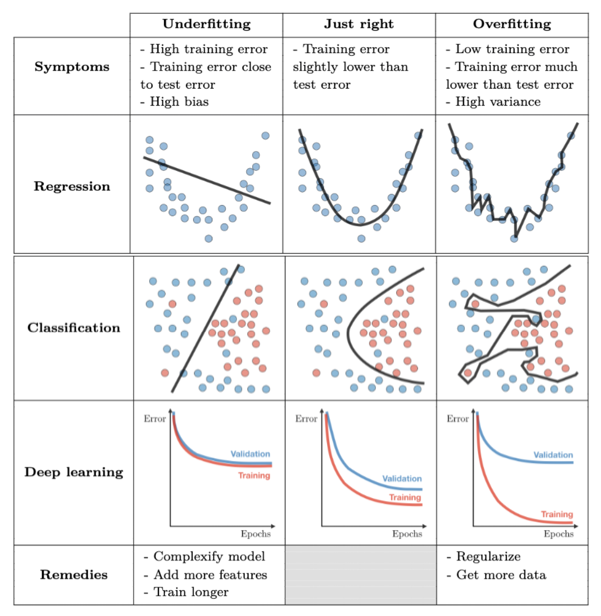